In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils 
from sklearn import linear_model, preprocessing
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv("/Users/Owner/Desktop/CSV File/titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

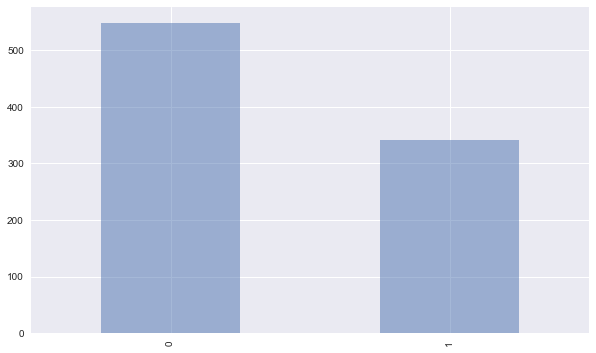

In [5]:
fig = plt.figure(figsize=(10, 6))

data.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.show()

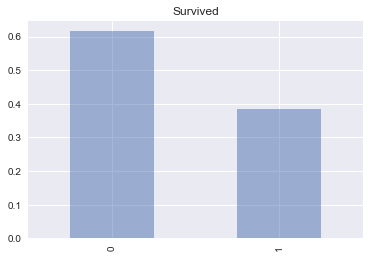

In [6]:
data.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Survived")
plt.show()

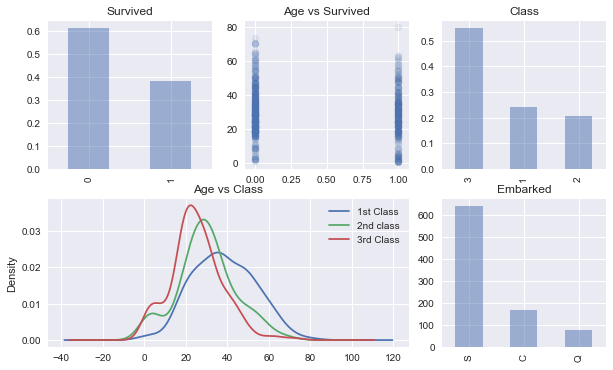

In [7]:
fig = plt.figure(figsize=(10, 6))

plt.subplot2grid((2, 3), (0,0))
data.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Survived")

plt.subplot2grid((2, 3), (0,1))
plt.scatter(x=data.Survived, y=data.Age, alpha=0.1)
plt.title("Age vs Survived")

plt.subplot2grid((2, 3), (0,2))
data.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Class")

plt.subplot2grid((2, 3), (1, 0), colspan=2)
for x in [1, 2, 3]:
    data.Age[data.Pclass == x].plot(kind="kde")
plt.title("Age vs Class")
plt.legend(("1st Class", "2nd class", "3rd Class"))

plt.subplot2grid((2, 3), (1, 2))
data.Embarked.value_counts().plot(kind="bar", alpha=0.5)
plt.title("Embarked")

plt.show()

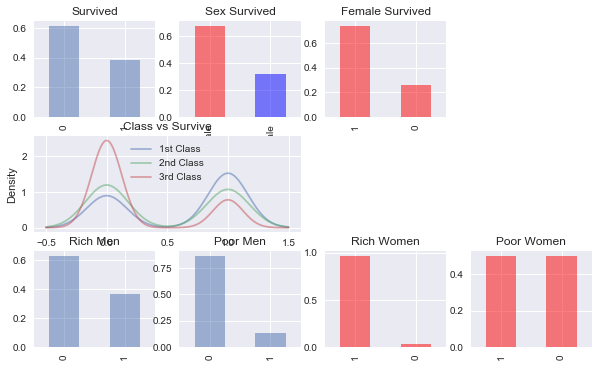

In [8]:
fig = plt.figure(figsize=(10, 6))

female_color = "#FA0000"

plt.subplot2grid((3, 4), (0, 0))
data.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((3, 4), (0, 1))
data.Survived[data.Sex == "male"].value_counts(normalize = True).plot(kind="bar", alpha=0.5)
plt.title("Male Survived")

plt.subplot2grid((3, 4), (0, 2))
data.Survived[data.Sex == "female"].value_counts(normalize = True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Female Survived")

plt.subplot2grid((3, 4), (0, 1))
data.Sex[data.Survived == 1].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=[female_color, "b"])
plt.title("Sex Survived")

plt.subplot2grid((3, 4), (1, 0), colspan=2)
for x in [1, 2, 3]:
    data.Survived[data.Pclass == x].plot(kind="kde", alpha=0.5)
plt.legend(("1st Class", "2nd Class", "3rd Class"))
plt.title("Class vs Survive")

plt.subplot2grid((3, 4), (2, 0))
data.Survived[(data.Sex == "male")&(data.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Rich Men")

plt.subplot2grid((3, 4), (2, 1))
data.Survived[(data.Sex == "male")&(data.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Poor Men")

plt.subplot2grid((3, 4), (2, 2))
data.Survived[(data.Sex == "female")&(data.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Rich Women")

plt.subplot2grid((3, 4), (2, 3))
data.Survived[(data.Sex == "female")&(data.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color = female_color)
plt.title("Poor Women")

### Hypothesis: If a passenger is female, then she will survive

In [9]:
data['Hyp'] = 0
data.loc[data.Sex == "female", "Hyp"] = 1

data["Result"] = 0
data.loc[data.Survived == data["Hyp"], "Result"] = 1

data.Result.value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

In [10]:
data.Age.isnull().values.any()

True

In [11]:
def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].median())
    
    data.loc[data.Sex == "male", "Sex"] = 0
    data.loc[data.Sex == "female", "Sex"] = 1
    
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

In [12]:
train = pd.read_csv("/Users/Owner/Desktop/CSV File/titanic_train.csv")

In [13]:
clean_data(train)
target = train["Survived"].values
features = train[["Pclass", "Age", "Sex", "SibSp", "Parch"]].values

classifier = linear_model.LogisticRegression()

classifier_ = classifier.fit(features, target)
classifier_.score(features, target)

0.79349046015712688

In [14]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
classifier_.score(poly_features, target)

0.83052749719416386

In [18]:
train_2 = pd.read_csv("/Users/Owner/Desktop/CSV File/titanic_train.csv")

In [19]:
from sklearn import tree, model_selection

clean_data(train_2)
target = train_2["Survived"].values
features = train_2[["Pclass", "Age", "Sex", "SibSp", "Parch"]].values

decision_tree = tree.DecisionTreeClassifier(random_state=1)
decision_tree_ = decision_tree.fit(features, target)
print(decision_tree_.score(features, target))

scores = model_selection.cross_val_score(decision_tree, features, target, scoring="accuracy", cv=50)
print(scores)
print(scores.mean())

0.916947250281
[ 0.77777778  0.72222222  0.77777778  0.88888889  0.77777778  0.77777778
  0.61111111  0.77777778  0.77777778  0.88888889  0.77777778  0.72222222
  0.77777778  0.77777778  0.77777778  0.77777778  0.94444444  0.83333333
  0.83333333  0.88888889  0.94444444  0.72222222  0.83333333  0.77777778
  0.72222222  0.83333333  0.83333333  0.88888889  0.55555556  0.83333333
  0.77777778  0.66666667  0.88888889  0.94444444  0.83333333  0.72222222
  0.66666667  0.72222222  0.83333333  0.88888889  0.88888889  0.83333333
  0.76470588  0.76470588  0.94117647  0.76470588  0.82352941  0.82352941
  0.82352941  0.875     ]
0.801617647059


In [27]:
generalized_tree = tree.DecisionTreeClassifier(
    random_state=1,
    max_depth=7,
    min_samples_split=2,
)

generalized_tree_ = generalized_tree.fit(features, target)
print(generalized_tree_.score(features, target))

scores = model_selection.cross_val_score(generalized_tree, features, target, scoring="accuracy", cv=50)
print(scores)
print(scores.mean())

0.852974186308
[ 0.88888889  0.72222222  0.77777778  0.94444444  0.72222222  0.83333333
  0.55555556  0.77777778  0.77777778  0.94444444  0.83333333  0.77777778
  0.83333333  0.77777778  0.66666667  0.66666667  0.94444444  0.77777778
  0.88888889  0.94444444  0.94444444  0.72222222  0.77777778  0.77777778
  0.77777778  0.77777778  0.83333333  0.83333333  0.61111111  0.88888889
  0.72222222  0.72222222  0.83333333  0.83333333  0.88888889  0.77777778
  0.72222222  0.77777778  0.77777778  0.77777778  0.83333333  0.88888889
  0.76470588  0.88235294  0.76470588  0.76470588  0.76470588  0.82352941
  1.          0.875     ]
0.803905228758


In [29]:
tree.export_graphviz(generalized_tree_, feature_names=features, out_file="tree.dot")